# EDA and Data Pre-processing

## Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import csv
import datetime as dt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
import math
import xgboost

## Importing Dataset

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

## Pre-processing on Train Dataset

## Repeat pre-cleaning below before training the model

## Feature Engineering to Create "dist_mrt" from Auxiliary Data

In [3]:
# do not change order of this .dropna() function
train.dropna()
train = train.reset_index(drop=True)
train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,2005-03,woodlands,4 room,537,Woodlands Drive 16,01 to 03,101.0,model a,uncategorized,2000,1.429658,103.792583,0.0,woodlands south,woodlands,north region,238500.0
431728,2016-04,sengkang,4 room,410A,fernvale road,13 to 15,95.0,premium apartment,uncategorized,2012,1.390053,103.875941,0.0,fernvale,sengkang,north-east region,376200.0
431729,2011-01,tampines,3-room,829,tampines street 81,01 to 03,67.0,new generation,uncategorized,1986,1.349224,103.934913,0.0,tampines west,tampines,east region,255600.0
431730,2013-05,sengkang,5-room,233,compassvale walk,16 to 18,123.0,improved,uncategorized,1999,1.389941,103.900721,0.0,sengkang town centre,sengkang,north-east region,508500.0


In [4]:
with open('./auxiliary-data/distance-to-mrt.csv', newline='') as f:
    reader = csv.reader(f)
    mrt_list = list(reader)

In [5]:
train['dist_mrt'] = np.array(mrt_list).astype(float)
train.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price,dist_mrt
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,01 to 03,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0,1.137651
1,2014-10,punggol,5-room,196B,punggol field,10 to 12,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0,0.118453
2,2020-09,sengkang,5 room,404A,fernvale lane,01 to 03,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0,0.479542
3,2000-10,clementi,3 room,375,clementi avenue 4,07 to 09,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0,0.421346
4,2013-01,bukit batok,3-room,163,bukit batok street 11,07 to 09,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0,0.775005


## Convert "storey_range" into Numerical Data Type "storey_average"

In [6]:
# first number in "storey_range"
train['lower'] = train['storey_range'].str.extract('(\d+)').astype(str).astype(int)
train['upper'] = train['storey_range'].str.extract('(\d+$)').astype(str).astype(int)
# calculate average storey from the range
train['storey_average'] = train['upper'] + train['lower']
train['storey_average'] = train['storey_average'] / 2.0
train = train.drop(columns=['storey_range', 'lower', 'upper'])
train.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price,dist_mrt,storey_average
0,2001-08,pasir ris,4 room,440,pasir ris drive 4,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0,1.137651,2.0
1,2014-10,punggol,5-room,196B,punggol field,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0,0.118453,11.0
2,2020-09,sengkang,5 room,404A,fernvale lane,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0,0.479542,2.0
3,2000-10,clementi,3 room,375,clementi avenue 4,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0,0.421346,8.0
4,2013-01,bukit batok,3-room,163,bukit batok street 11,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0,0.775005,8.0


## Convert "flat_type" to Ordinal Data Type "flattype_mapping"

In [7]:
train = train.replace(to_replace ="5 room", value ="5-room")
train = train.replace(to_replace ="4 room", value ="4-room")
train = train.replace(to_replace ="3 room", value ="3-room")
train = train.replace(to_replace ="2 room", value ="2-room")
train = train.replace(to_replace ="1 room", value ="1-room")
flattype_mapping={"1-room": 1,
                   "2-room": 2,
                   "3-room": 3,
                   "4-room": 4,
                   "5-room": 5,
                   "multi generation": 6,
                   "executive": 7,}
train["flattype_mapping"] = train['flat_type'].map(flattype_mapping)
train = train.drop(columns=['flat_type'])
train.head()

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,resale_price,dist_mrt,storey_average,flattype_mapping
0,2001-08,pasir ris,440,pasir ris drive 4,118.0,model a,uncategorized,1989,1.369008,103.958697,0.0,pasir ris drive,pasir ris,east region,209700.0,1.137651,2.0,4
1,2014-10,punggol,196B,punggol field,110.0,improved,uncategorized,2003,1.399007,103.906991,0.0,punggol field,punggol,north-east region,402300.0,0.118453,11.0,5
2,2020-09,sengkang,404A,fernvale lane,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,0.0,fernvale,sengkang,north-east region,351000.0,0.479542,2.0,5
3,2000-10,clementi,375,clementi avenue 4,67.0,new generation,uncategorized,1980,1.318493,103.766702,0.0,clementi north,clementi,west region,151200.0,0.421346,8.0,3
4,2013-01,bukit batok,163,bukit batok street 11,73.0,model a,uncategorized,1985,1.348149,103.742658,0.0,bukit batok west,bukit batok,west region,318600.0,0.775005,8.0,3


## Convert "region" to one-hot encoding

In [8]:
train = pd.get_dummies(train, columns=['region'], prefix=['region'])
train

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,...,planning_area,resale_price,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region
0,2001-08,pasir ris,440,pasir ris drive 4,118.0,model a,uncategorized,1989,1.369008,103.958697,...,pasir ris,209700.0,1.137651,2.0,4,0,1,0,0,0
1,2014-10,punggol,196B,punggol field,110.0,improved,uncategorized,2003,1.399007,103.906991,...,punggol,402300.0,0.118453,11.0,5,0,0,0,1,0
2,2020-09,sengkang,404A,fernvale lane,112.0,premium apartment,uncategorized,2004,1.388348,103.873815,...,sengkang,351000.0,0.479542,2.0,5,0,0,0,1,0
3,2000-10,clementi,375,clementi avenue 4,67.0,new generation,uncategorized,1980,1.318493,103.766702,...,clementi,151200.0,0.421346,8.0,3,0,0,0,0,1
4,2013-01,bukit batok,163,bukit batok street 11,73.0,model a,uncategorized,1985,1.348149,103.742658,...,bukit batok,318600.0,0.775005,8.0,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,2005-03,woodlands,537,Woodlands Drive 16,101.0,model a,uncategorized,2000,1.429658,103.792583,...,woodlands,238500.0,0.300402,2.0,4,0,0,1,0,0
431728,2016-04,sengkang,410A,fernvale road,95.0,premium apartment,uncategorized,2012,1.390053,103.875941,...,sengkang,376200.0,0.206723,14.0,4,0,0,0,1,0
431729,2011-01,tampines,829,tampines street 81,67.0,new generation,uncategorized,1986,1.349224,103.934913,...,tampines,255600.0,0.567511,2.0,3,0,1,0,0,0
431730,2013-05,sengkang,233,compassvale walk,123.0,improved,uncategorized,1999,1.389941,103.900721,...,sengkang,508500.0,0.503935,17.0,5,0,0,0,1,0


## Feature engineering to create "remaining_lease" feature from "lease_commencement_date"

In [9]:
lease_commence_date = train['lease_commence_date'].to_numpy()
#assuming 99-year lease, we calculate the remaining years on the lease
remaining_lease = lease_commence_date + 99 - pd.DatetimeIndex(train['month']).year.to_numpy()
train['remaining_lease'] = remaining_lease
train = train.drop(columns=['lease_commence_date'])
train.head()

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,latitude,longitude,elevation,...,resale_price,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2001-08,pasir ris,440,pasir ris drive 4,118.0,model a,uncategorized,1.369008,103.958697,0.0,...,209700.0,1.137651,2.0,4,0,1,0,0,0,87
1,2014-10,punggol,196B,punggol field,110.0,improved,uncategorized,1.399007,103.906991,0.0,...,402300.0,0.118453,11.0,5,0,0,0,1,0,88
2,2020-09,sengkang,404A,fernvale lane,112.0,premium apartment,uncategorized,1.388348,103.873815,0.0,...,351000.0,0.479542,2.0,5,0,0,0,1,0,83
3,2000-10,clementi,375,clementi avenue 4,67.0,new generation,uncategorized,1.318493,103.766702,0.0,...,151200.0,0.421346,8.0,3,0,0,0,0,1,79
4,2013-01,bukit batok,163,bukit batok street 11,73.0,model a,uncategorized,1.348149,103.742658,0.0,...,318600.0,0.775005,8.0,3,0,0,0,0,1,71


## Convert "flat_model" to Ordinal Data Type

In [10]:
flat_models = train.groupby('flat_model')
keys = flat_models.groups.keys()

flat_type_dict = {}

# store the average "resale_price" of each "flat_model" in a dictionary with
#    key : "flat_model"
#    value : average "resale_price"
for key in keys:
    df_i = flat_models.get_group(key)
    flat_type_dict.update({key : df_i["resale_price"].mean()})

# ordering the different "flat_model" by average "resale_price" (ascending order)
{k: v for k, v in sorted(flat_type_dict.items(), key=lambda item: item[1])}
# print(flat_type_dict)
# print(flat_type_dict.keys())

# save the ordered list of keys from dictionary as a list for easier index finding
flat_model_list = list(flat_type_dict.keys())
print(flat_model_list)

for flat_model in flat_model_list:
    ordinal_value = flat_model_list.index(flat_model) + 1
    train['flat_model'] = train['flat_model'].str.replace(rf'^{flat_model}$', str(ordinal_value), regex=True)
    
train['flat_model'] = np.array(train['flat_model']).astype(str).astype(int)
train.head()


['2-room', 'adjoined flat', 'apartment', 'dbss', 'improved', 'improved maisonette', 'maisonette', 'model a', 'model a maisonette', 'model a2', 'multi generation', 'new generation', 'premium apartment', 'premium apartment loft', 'premium maisonette', 'simplified', 'standard', 'terrace', 'type s1', 'type s2']


,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,latitude,longitude,elevation,...,resale_price,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2001-08,pasir ris,440,pasir ris drive 4,118.0,8,uncategorized,1.369008,103.958697,0.0,...,209700.0,1.137651,2.0,4,0,1,0,0,0,87
1,2014-10,punggol,196B,punggol field,110.0,5,uncategorized,1.399007,103.906991,0.0,...,402300.0,0.118453,11.0,5,0,0,0,1,0,88
2,2020-09,sengkang,404A,fernvale lane,112.0,13,uncategorized,1.388348,103.873815,0.0,...,351000.0,0.479542,2.0,5,0,0,0,1,0,83
3,2000-10,clementi,375,clementi avenue 4,67.0,12,uncategorized,1.318493,103.766702,0.0,...,151200.0,0.421346,8.0,3,0,0,0,0,1,79
4,2013-01,bukit batok,163,bukit batok street 11,73.0,8,uncategorized,1.348149,103.742658,0.0,...,318600.0,0.775005,8.0,3,0,0,0,0,1,71


## Drop Columns "block", "street_name", and "eco_category"

In [11]:
train = train.drop(columns=['block', 'street_name', 'eco_category'])
train.head()

,month,town,floor_area_sqm,flat_model,latitude,longitude,elevation,subzone,planning_area,resale_price,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2001-08,pasir ris,118.0,8,1.369008,103.958697,0.0,pasir ris drive,pasir ris,209700.0,1.137651,2.0,4,0,1,0,0,0,87
1,2014-10,punggol,110.0,5,1.399007,103.906991,0.0,punggol field,punggol,402300.0,0.118453,11.0,5,0,0,0,1,0,88
2,2020-09,sengkang,112.0,13,1.388348,103.873815,0.0,fernvale,sengkang,351000.0,0.479542,2.0,5,0,0,0,1,0,83
3,2000-10,clementi,67.0,12,1.318493,103.766702,0.0,clementi north,clementi,151200.0,0.421346,8.0,3,0,0,0,0,1,79
4,2013-01,bukit batok,73.0,8,1.348149,103.742658,0.0,bukit batok west,bukit batok,318600.0,0.775005,8.0,3,0,0,0,0,1,71


## Drop Columns "elevation", "town", "subzone" and "planning_area"

In [12]:
train = train.drop(columns=['elevation','town','subzone','planning_area'])
train.head()

,month,floor_area_sqm,flat_model,latitude,longitude,resale_price,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2001-08,118.0,8,1.369008,103.958697,209700.0,1.137651,2.0,4,0,1,0,0,0,87
1,2014-10,110.0,5,1.399007,103.906991,402300.0,0.118453,11.0,5,0,0,0,1,0,88
2,2020-09,112.0,13,1.388348,103.873815,351000.0,0.479542,2.0,5,0,0,0,1,0,83
3,2000-10,67.0,12,1.318493,103.766702,151200.0,0.421346,8.0,3,0,0,0,0,1,79
4,2013-01,73.0,8,1.348149,103.742658,318600.0,0.775005,8.0,3,0,0,0,0,1,71


## Convert "month" to datetime

In [13]:
train['month'] = pd.to_datetime(train['month'])
train['datetime_month']= train['month'].map(dt.datetime.toordinal)

In [14]:
train_with_data = train.copy()
train_with_data.head()

,month,floor_area_sqm,flat_model,latitude,longitude,resale_price,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease,datetime_month
0,2001-08-01,118.0,8,1.369008,103.958697,209700.0,1.137651,2.0,4,0,1,0,0,0,87,730698
1,2014-10-01,110.0,5,1.399007,103.906991,402300.0,0.118453,11.0,5,0,0,0,1,0,88,735507
2,2020-09-01,112.0,13,1.388348,103.873815,351000.0,0.479542,2.0,5,0,0,0,1,0,83,737669
3,2000-10-01,67.0,12,1.318493,103.766702,151200.0,0.421346,8.0,3,0,0,0,0,1,79,730394
4,2013-01-01,73.0,8,1.348149,103.742658,318600.0,0.775005,8.0,3,0,0,0,0,1,71,734869


## Pre-processing on Test Dataset

## Feature Engineering to Create "dist_mrt" from Auxiliary Data

In [15]:
test.dropna()
test = test.reset_index(drop=True)
test

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region
0,2004-01,bukit batok,4 room,186,bukit batok west avenue 6,04 to 06,94.0,new generation,uncategorized,1989,1.346581,103.744085,0.0,bukit batok west,bukit batok,west region
1,2001-11,tampines,5 room,366,tampines street 34,04 to 06,122.0,improved,uncategorized,1997,1.357618,103.961379,0.0,tampines east,tampines,east region
2,2002-07,jurong east,3 room,206,jurong east street 21,01 to 03,67.0,new generation,uncategorized,1982,1.337804,103.741998,0.0,toh guan,jurong east,west region
3,2015-04,ang mo kio,3 room,180,Ang Mo Kio Avenue 5,04 to 06,82.0,new generation,uncategorized,1981,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,north-east region
4,2004-04,clementi,5 room,356,clementi avenue 2,01 to 03,117.0,standard,uncategorized,1978,1.313960,103.769831,0.0,clementi north,clementi,west region
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04,hougang,5 room,981D,buangkok crescent,10 to 12,110.0,improved,uncategorized,2003,1.380452,103.879333,0.0,trafalgar,hougang,north-east region
107930,2006-01,kallang/whampoa,4 room,13,upper boon keng road,13 to 15,102.0,model a,uncategorized,1999,1.314481,103.870458,0.0,boon keng,kallang,central region
107931,2000-01,kallang/whampoa,3 room,1,beach road,07 to 09,68.0,improved,uncategorized,1979,1.294924,103.854315,0.0,city hall,downtown core,central region
107932,2009-07,jurong west,4 room,919,jurong west street 91,10 to 12,104.0,model a,uncategorized,1988,1.339927,103.687354,0.0,yunnan,jurong west,west region


In [16]:
with open('./auxiliary-data/distance-to-mrt-test-edited.csv', newline='') as f:
    reader = csv.reader(f)
    mrt_list = list(reader)

In [17]:
test['dist_mrt'] = np.array(mrt_list).astype(float)
test

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,dist_mrt
0,2004-01,bukit batok,4 room,186,bukit batok west avenue 6,04 to 06,94.0,new generation,uncategorized,1989,1.346581,103.744085,0.0,bukit batok west,bukit batok,west region,0.667554
1,2001-11,tampines,5 room,366,tampines street 34,04 to 06,122.0,improved,uncategorized,1997,1.357618,103.961379,0.0,tampines east,tampines,east region,0.767025
2,2002-07,jurong east,3 room,206,jurong east street 21,01 to 03,67.0,new generation,uncategorized,1982,1.337804,103.741998,0.0,toh guan,jurong east,west region,0.515380
3,2015-04,ang mo kio,3 room,180,Ang Mo Kio Avenue 5,04 to 06,82.0,new generation,uncategorized,1981,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,north-east region,0.547114
4,2004-04,clementi,5 room,356,clementi avenue 2,01 to 03,117.0,standard,uncategorized,1978,1.313960,103.769831,0.0,clementi north,clementi,west region,0.516298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04,hougang,5 room,981D,buangkok crescent,10 to 12,110.0,improved,uncategorized,2003,1.380452,103.879333,0.0,trafalgar,hougang,north-east region,1.221624
107930,2006-01,kallang/whampoa,4 room,13,upper boon keng road,13 to 15,102.0,model a,uncategorized,1999,1.314481,103.870458,0.0,boon keng,kallang,central region,0.346682
107931,2000-01,kallang/whampoa,3 room,1,beach road,07 to 09,68.0,improved,uncategorized,1979,1.294924,103.854315,0.0,city hall,downtown core,central region,0.221181
107932,2009-07,jurong west,4 room,919,jurong west street 91,10 to 12,104.0,model a,uncategorized,1988,1.339927,103.687354,0.0,yunnan,jurong west,west region,1.138997


## Convert "storey_range" into Numerical Data Type "storey_average" 

In [18]:
test['lower'] = test['storey_range'].str.extract('(\d+)').astype(str).astype(int)
test['upper'] = test['storey_range'].str.extract('(\d+$)').astype(str).astype(int)
# calculate average storey from the range
test['storey_average'] = test['upper'] + test['lower']
test['storey_average'] = test['storey_average'] / 2.0
test = test.drop(columns=['storey_range', 'lower', 'upper'])
test

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,dist_mrt,storey_average
0,2004-01,bukit batok,4 room,186,bukit batok west avenue 6,94.0,new generation,uncategorized,1989,1.346581,103.744085,0.0,bukit batok west,bukit batok,west region,0.667554,5.0
1,2001-11,tampines,5 room,366,tampines street 34,122.0,improved,uncategorized,1997,1.357618,103.961379,0.0,tampines east,tampines,east region,0.767025,5.0
2,2002-07,jurong east,3 room,206,jurong east street 21,67.0,new generation,uncategorized,1982,1.337804,103.741998,0.0,toh guan,jurong east,west region,0.515380,2.0
3,2015-04,ang mo kio,3 room,180,Ang Mo Kio Avenue 5,82.0,new generation,uncategorized,1981,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,north-east region,0.547114,5.0
4,2004-04,clementi,5 room,356,clementi avenue 2,117.0,standard,uncategorized,1978,1.313960,103.769831,0.0,clementi north,clementi,west region,0.516298,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04,hougang,5 room,981D,buangkok crescent,110.0,improved,uncategorized,2003,1.380452,103.879333,0.0,trafalgar,hougang,north-east region,1.221624,11.0
107930,2006-01,kallang/whampoa,4 room,13,upper boon keng road,102.0,model a,uncategorized,1999,1.314481,103.870458,0.0,boon keng,kallang,central region,0.346682,14.0
107931,2000-01,kallang/whampoa,3 room,1,beach road,68.0,improved,uncategorized,1979,1.294924,103.854315,0.0,city hall,downtown core,central region,0.221181,8.0
107932,2009-07,jurong west,4 room,919,jurong west street 91,104.0,model a,uncategorized,1988,1.339927,103.687354,0.0,yunnan,jurong west,west region,1.138997,11.0


## Convert "flat_type" to Ordinal Data Type "flattype_mapping"

In [19]:
test = test.replace(to_replace ="5 room", value ="5-room")
test = test.replace(to_replace ="4 room", value ="4-room")
test = test.replace(to_replace ="3 room", value ="3-room")
test = test.replace(to_replace ="2 room", value ="2-room")
test = test.replace(to_replace ="1 room", value ="1-room")
flattype_mapping={"1-room": 1,
                   "2-room": 2,
                   "3-room": 3,
                   "4-room": 4,
                   "5-room": 5,
                   "multi generation": 6,
                   "executive": 7,}
test["flattype_mapping"] = test['flat_type'].map(flattype_mapping)
test = test.drop(columns=['flat_type'])
test

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,dist_mrt,storey_average,flattype_mapping
0,2004-01,bukit batok,186,bukit batok west avenue 6,94.0,new generation,uncategorized,1989,1.346581,103.744085,0.0,bukit batok west,bukit batok,west region,0.667554,5.0,4
1,2001-11,tampines,366,tampines street 34,122.0,improved,uncategorized,1997,1.357618,103.961379,0.0,tampines east,tampines,east region,0.767025,5.0,5
2,2002-07,jurong east,206,jurong east street 21,67.0,new generation,uncategorized,1982,1.337804,103.741998,0.0,toh guan,jurong east,west region,0.515380,2.0,3
3,2015-04,ang mo kio,180,Ang Mo Kio Avenue 5,82.0,new generation,uncategorized,1981,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,north-east region,0.547114,5.0,3
4,2004-04,clementi,356,clementi avenue 2,117.0,standard,uncategorized,1978,1.313960,103.769831,0.0,clementi north,clementi,west region,0.516298,2.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04,hougang,981D,buangkok crescent,110.0,improved,uncategorized,2003,1.380452,103.879333,0.0,trafalgar,hougang,north-east region,1.221624,11.0,5
107930,2006-01,kallang/whampoa,13,upper boon keng road,102.0,model a,uncategorized,1999,1.314481,103.870458,0.0,boon keng,kallang,central region,0.346682,14.0,4
107931,2000-01,kallang/whampoa,1,beach road,68.0,improved,uncategorized,1979,1.294924,103.854315,0.0,city hall,downtown core,central region,0.221181,8.0,3
107932,2009-07,jurong west,919,jurong west street 91,104.0,model a,uncategorized,1988,1.339927,103.687354,0.0,yunnan,jurong west,west region,1.138997,11.0,4


## Convert "region" to one hot encoding

In [20]:
test = pd.get_dummies(test, columns=['region'], prefix=['region'])
test

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,lease_commence_date,latitude,longitude,...,subzone,planning_area,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region
0,2004-01,bukit batok,186,bukit batok west avenue 6,94.0,new generation,uncategorized,1989,1.346581,103.744085,...,bukit batok west,bukit batok,0.667554,5.0,4,0,0,0,0,1
1,2001-11,tampines,366,tampines street 34,122.0,improved,uncategorized,1997,1.357618,103.961379,...,tampines east,tampines,0.767025,5.0,5,0,1,0,0,0
2,2002-07,jurong east,206,jurong east street 21,67.0,new generation,uncategorized,1982,1.337804,103.741998,...,toh guan,jurong east,0.515380,2.0,3,0,0,0,0,1
3,2015-04,ang mo kio,180,Ang Mo Kio Avenue 5,82.0,new generation,uncategorized,1981,1.380084,103.849574,...,yio chu kang east,ang mo kio,0.547114,5.0,3,0,0,0,1,0
4,2004-04,clementi,356,clementi avenue 2,117.0,standard,uncategorized,1978,1.313960,103.769831,...,clementi north,clementi,0.516298,2.0,5,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04,hougang,981D,buangkok crescent,110.0,improved,uncategorized,2003,1.380452,103.879333,...,trafalgar,hougang,1.221624,11.0,5,0,0,0,1,0
107930,2006-01,kallang/whampoa,13,upper boon keng road,102.0,model a,uncategorized,1999,1.314481,103.870458,...,boon keng,kallang,0.346682,14.0,4,1,0,0,0,0
107931,2000-01,kallang/whampoa,1,beach road,68.0,improved,uncategorized,1979,1.294924,103.854315,...,city hall,downtown core,0.221181,8.0,3,1,0,0,0,0
107932,2009-07,jurong west,919,jurong west street 91,104.0,model a,uncategorized,1988,1.339927,103.687354,...,yunnan,jurong west,1.138997,11.0,4,0,0,0,0,1


## Feature engineering to create "remaining_lease" feature from "lease_commencement_date"

In [21]:
lease_commence_date = test['lease_commence_date'].to_numpy()
#assuming 99-year lease, we calculate the remaining years on the lease
remaining_lease = lease_commence_date + 99 - pd.DatetimeIndex(test['month']).year.to_numpy()
test['remaining_lease'] = remaining_lease
test = test.drop(columns=['lease_commence_date'])
test.head()

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,latitude,longitude,elevation,...,planning_area,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2004-01,bukit batok,186,bukit batok west avenue 6,94.0,new generation,uncategorized,1.346581,103.744085,0.0,...,bukit batok,0.667554,5.0,4,0,0,0,0,1,84
1,2001-11,tampines,366,tampines street 34,122.0,improved,uncategorized,1.357618,103.961379,0.0,...,tampines,0.767025,5.0,5,0,1,0,0,0,95
2,2002-07,jurong east,206,jurong east street 21,67.0,new generation,uncategorized,1.337804,103.741998,0.0,...,jurong east,0.515380,2.0,3,0,0,0,0,1,79
3,2015-04,ang mo kio,180,Ang Mo Kio Avenue 5,82.0,new generation,uncategorized,1.380084,103.849574,0.0,...,ang mo kio,0.547114,5.0,3,0,0,0,1,0,65
4,2004-04,clementi,356,clementi avenue 2,117.0,standard,uncategorized,1.313960,103.769831,0.0,...,clementi,0.516298,2.0,5,0,0,0,0,1,73


## Convert "flat_model" to Ordinal Data Type

In [22]:
# uses the same "flat_model_list" extracted from the "flat_model" dictionary calculated from train dataset
for flat_model in flat_model_list:
    ordinal_value = flat_model_list.index(flat_model) + 1
    test['flat_model'] = test['flat_model'].str.replace(rf'^{flat_model}$', str(ordinal_value), regex=True)
test['flat_model'] = np.array(test['flat_model']).astype(str).astype(int)
test.head()

,month,town,block,street_name,floor_area_sqm,flat_model,eco_category,latitude,longitude,elevation,...,planning_area,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2004-01,bukit batok,186,bukit batok west avenue 6,94.0,12,uncategorized,1.346581,103.744085,0.0,...,bukit batok,0.667554,5.0,4,0,0,0,0,1,84
1,2001-11,tampines,366,tampines street 34,122.0,5,uncategorized,1.357618,103.961379,0.0,...,tampines,0.767025,5.0,5,0,1,0,0,0,95
2,2002-07,jurong east,206,jurong east street 21,67.0,12,uncategorized,1.337804,103.741998,0.0,...,jurong east,0.515380,2.0,3,0,0,0,0,1,79
3,2015-04,ang mo kio,180,Ang Mo Kio Avenue 5,82.0,12,uncategorized,1.380084,103.849574,0.0,...,ang mo kio,0.547114,5.0,3,0,0,0,1,0,65
4,2004-04,clementi,356,clementi avenue 2,117.0,17,uncategorized,1.313960,103.769831,0.0,...,clementi,0.516298,2.0,5,0,0,0,0,1,73


## Drop Columns "block", "street_name", and "eco_category"

In [23]:
test = test.drop(columns=['block', 'street_name', 'eco_category'])
test.head()

,month,town,floor_area_sqm,flat_model,latitude,longitude,elevation,subzone,planning_area,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2004-01,bukit batok,94.0,12,1.346581,103.744085,0.0,bukit batok west,bukit batok,0.667554,5.0,4,0,0,0,0,1,84
1,2001-11,tampines,122.0,5,1.357618,103.961379,0.0,tampines east,tampines,0.767025,5.0,5,0,1,0,0,0,95
2,2002-07,jurong east,67.0,12,1.337804,103.741998,0.0,toh guan,jurong east,0.515380,2.0,3,0,0,0,0,1,79
3,2015-04,ang mo kio,82.0,12,1.380084,103.849574,0.0,yio chu kang east,ang mo kio,0.547114,5.0,3,0,0,0,1,0,65
4,2004-04,clementi,117.0,17,1.313960,103.769831,0.0,clementi north,clementi,0.516298,2.0,5,0,0,0,0,1,73


## Drop Columns "elevation", "town", "subzone" and "planning_area"

In [24]:
test = test.drop(columns=['elevation','town','subzone','planning_area'])
test.head()

,month,floor_area_sqm,flat_model,latitude,longitude,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease
0,2004-01,94.0,12,1.346581,103.744085,0.667554,5.0,4,0,0,0,0,1,84
1,2001-11,122.0,5,1.357618,103.961379,0.767025,5.0,5,0,1,0,0,0,95
2,2002-07,67.0,12,1.337804,103.741998,0.515380,2.0,3,0,0,0,0,1,79
3,2015-04,82.0,12,1.380084,103.849574,0.547114,5.0,3,0,0,0,1,0,65
4,2004-04,117.0,17,1.313960,103.769831,0.516298,2.0,5,0,0,0,0,1,73


## Convert "month" to datetime

In [25]:
test['month'] = pd.to_datetime(test['month'])
test['datetime_month']= test['month'].map(dt.datetime.toordinal)

In [26]:
test

,month,floor_area_sqm,flat_model,latitude,longitude,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease,datetime_month
0,2004-01-01,94.0,12,1.346581,103.744085,0.667554,5.0,4,0,0,0,0,1,84,731581
1,2001-11-01,122.0,5,1.357618,103.961379,0.767025,5.0,5,0,1,0,0,0,95,730790
2,2002-07-01,67.0,12,1.337804,103.741998,0.515380,2.0,3,0,0,0,0,1,79,731032
3,2015-04-01,82.0,12,1.380084,103.849574,0.547114,5.0,3,0,0,0,1,0,65,735689
4,2004-04-01,117.0,17,1.313960,103.769831,0.516298,2.0,5,0,0,0,0,1,73,731672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,2008-04-01,110.0,5,1.380452,103.879333,1.221624,11.0,5,0,0,0,1,0,94,733133
107930,2006-01-01,102.0,8,1.314481,103.870458,0.346682,14.0,4,1,0,0,0,0,92,732312
107931,2000-01-01,68.0,5,1.294924,103.854315,0.221181,8.0,3,1,0,0,0,0,78,730120
107932,2009-07-01,104.0,8,1.339927,103.687354,1.138997,11.0,4,0,0,0,0,1,78,733589


# Experimenting with various ML models

## Implement linear regression

In [259]:
X = train.drop (["resale_price", "month"],axis = 1)
y = train["resale_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [445]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [446]:
print(regressor.intercept_)
print(regressor.coef_)
print('Training score: {}'.format(regressor.score(X_train, y_train)))
print('Test score: {}'.format(regressor.score(X_test, y_test)))

-29945027.554563683
[ 2.41134868e+03  9.94147956e+02 -9.82572853e+05  4.10440727e+04
 -1.58815763e+04 -3.62493235e+04  3.84796687e+04  1.11517261e+03
  1.63507887e+04  2.38692243e+04 -1.31577842e+04  2.02620750e+04
  3.50291243e+03 -3.44764276e+04  2.23769216e+03  3.64668263e+01]
Training score: 0.7915924665460026
Test score: 0.7891979333601642


In [447]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)
print('RMSE for Linear Regression => ',np.sqrt(mean_squared_error(y_test,y_pred)))

          Actual      Predicted
76998   319950.0  331083.083027
397501  315000.0  339260.343548
347486  396000.0  460663.919879
242624  243000.0  319792.689107
64696   194400.0  259165.994044
...          ...            ...
400889  189000.0  180928.703309
287118  292500.0  362791.924591
391252  238500.0  284130.059303
401219  159559.2  150656.625197
201018  220500.0  228062.297442

[86347 rows x 2 columns]
RMSE for Linear Regression =>  59489.00883760603


## Implement polynomial predictor

In [448]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
print(len(X_poly))
print(len(y))
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

431732
431732


LinearRegression()

In [449]:
print('Training score: {}'.format(lin_reg.score(X_poly, y)))
# print('Training score: {}'.format(lin_reg.score(X_test, y_test)))

Training score: 0.8687702493355828


In [450]:
y_pred = lin_reg.predict(X_poly)
df = pd.DataFrame({'Real Values':y, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,209700.0,214691.397038
1,402300.0,396429.510319
2,351000.0,500642.959538
3,151200.0,126869.674381
4,318600.0,252936.869694
...,...,...
431727,238500.0,217542.434147
431728,376200.0,459234.783756
431729,255600.0,239938.055241
431730,508500.0,415864.221256


## Implement pipeline predictor

In [451]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', LinearRegression())
]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))

Training score: 0.9321259466567403
Test score: 0.9320959686445839


In [452]:
y_pred_pipeline = pipeline.predict(X_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_pipeline})
print(df)
mse = mean_squared_error(y_test, y_pred_pipeline)
rmse = math.sqrt(mse)
print('RMSE: {}'.format(rmse))

        Real Values  Predicted Values
76998      319950.0          304468.0
397501     315000.0          355534.0
347486     396000.0          394536.0
242624     243000.0          280289.0
64696      194400.0          215075.0
...             ...               ...
400889     189000.0          203515.0
287118     292500.0          346456.0
391252     238500.0          262195.0
401219     159559.2          152140.0
201018     220500.0          204774.0

[86347 rows x 2 columns]
RMSE: 33763.470453538845


## Tuning number of features for pipeline predictor

In [501]:
scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

for p in range(1,5):
    print(p)
    poly = PolynomialFeatures(p)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    lin_reg = LinearRegression().fit(X_train_poly, y_train)

    y_train_pred = lin_reg.predict(X_train_poly)
    y_test_pred = lin_reg.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = math.sqrt(mse)
    print('RMSE: {}'.format(rmse))

1
RMSE: 59488.525022365335
2
RMSE: 50185.54311819719
3
RMSE: 33763.470453538845
4


MemoryError: Unable to allocate 12.5 GiB for an array with shape (345385, 4845) and data type float64

## Implement XG boost

In [295]:
xgb_regressor = xgboost.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, n_estimators = 1000)
xgb_regressor.fit(X_train, y_train)

y_pred_rf = xgb_regressor.predict(X_test)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_rf})
print(df)

mse = mean_squared_error(y_test, y_pred_rf)
rmse = math.sqrt(mse)
print('RMSE for random forest regression for dataset: {}'.format(rmse))

        Real Values  Predicted Values
76998     319950.00         326137.97
397501    315000.00         329924.44
347486    396000.00         406524.56
242624    243000.00         241392.64
64696     194400.00         196085.81
...             ...               ...
400889    189000.00         189676.05
287118    292500.00         298393.28
391252    238500.00         236991.81
401219    159559.20         152026.72
201018    220500.00         216943.16

[86347 rows x 2 columns]
RMSE for random forest regression for dataset: 16957.765615197197


In [298]:
pred = xgb_regressor.predict(test.drop(columns=['month']))
df_out = pd.DataFrame({'Predicted':pred})
df_out.reset_index(inplace=True)
df_out = df_out.rename(columns = {'index':'Id'})
print(df_out)
df_out.to_csv('./submission_xgb_full.csv', index = False, header=True)

            Id  Predicted
0            0  189723.30
1            1  303970.97
2            2  119944.59
3            3  321093.69
4            4  314263.31
...        ...        ...
107929  107929  331986.97
107930  107930  298446.34
107931  107931  159000.69
107932  107932  244500.81
107933  107933  332849.59

[107934 rows x 2 columns]


In [488]:
train_dmatrix = xgboost.DMatrix(data = X_train, label = y_train)
test_dmatrix = xgboost.DMatrix(data = X_test, label = y_test)

xgb_opt_regressor = xgb_r = xgboost.train(params = {'objective' :'reg:squarederror', 'lambda': 0.0001}, 
                                     dtrain = train_dmatrix, num_boost_round = 1000)

y_pred_xgb = xgb_opt_regressor.predict(test_dmatrix)
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_xgb})
print(df)

mse = mean_squared_error(y_test, y_pred_xgb)
rmse = math.sqrt(mse)
print('RMSE for optimized xgboost regression for dataset: {}'.format(rmse))

        Real Values  Predicted Values
392819    324000.00         321568.41
44810     324000.00         351305.72
300884    205200.00         196237.23
267541    400500.00         395827.25
331384    567000.00         566471.31
...             ...               ...
32016     529200.00         543206.50
195448    360000.00         361442.78
357612    326700.00         309989.94
416007    322200.00         304690.09
408379    765000.00         713991.31

[24390 rows x 2 columns]
RMSE for optimized xgboost regression for dataset: 21584.923573248358


## Compare other regression models offered by scikit-learn

In [498]:
from sklearn import linear_model

scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

models = [
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]


for item in models:
    print(item)
    model = item
    model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    print('RMSE: {}'.format(rmse))

SGDRegressor()
RMSE: 59105.260520049065
BayesianRidge()
RMSE: 59012.74630527616
LassoLars()
RMSE: 70899.45039972338
ARDRegression()


C:\Users\tanvi\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=1.356e+02, with an active set of 3 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\tanvi\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.108e+02, with an active set of 4 regressors, and the smallest cholesky pivot element being 1.054e-08. Reduce max_iter or increase eps parameters.
  warnings.warn('Regressors in active set degenerate. '
C:\Users\tanvi\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:571: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=7.762e+

RMSE: 59012.82754357305
PassiveAggressiveRegressor()
RMSE: 60430.22332118529
TheilSenRegressor(max_subpopulation=10000)
RMSE: 61061.90972446903
LinearRegression()
RMSE: 59010.264842596014


None of these models perform as well as the regression and xgboost models

## Try few classifier models

In [500]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression


X = train.drop (["resale_price", "month"],axis = 1)
y = train["resale_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

models = [KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          AdaBoostClassifier(),
          GradientBoostingClassifier(),
          LogisticRegression()]

for item in models:
    print(item)
    model = item
    # since classifiers dont accept float input
    model.fit(X_train, y_train.astype(int))
    y_pred = clf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    print('RMSE: {}'.format(rmse))

KNeighborsClassifier()
RMSE: 1.4045529694596254e+17
DecisionTreeClassifier()
RMSE: 1.4045529694596254e+17
RandomForestClassifier()


MemoryError: could not allocate 23655874560 bytes

## Trying lazy predict library to understand variety of regression models

In [28]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

X = train.drop (["resale_price", "month"],axis = 1)
y = train["resale_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler().fit(X_train)
X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 26%|█████████████████████▍                                                            | 11/42 [03:51<13:33, 26.24s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 889. GiB for an array with shape (345385, 345385) and data type float64


 40%|█████████████████████████████████▏                                                | 17/42 [05:20<05:30, 13.24s/it]

KernelRidge model failed to execute
Unable to allocate 889. GiB for an array with shape (345385, 345385) and data type float64


100%|███████████████████████████████████████████████████████████████████████████████| 42/42 [9:06:50<00:00, 781.21s/it]

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
RandomForestRegressor                        0.98       0.98  17586.35   
ExtraTreesRegressor                          0.98       0.98  17943.71   
BaggingRegressor                             0.98       0.98  18511.93   
XGBRegressor                                 0.98       0.98  19750.51   
LGBMRegressor                                0.97       0.97  22795.51   
HistGradientBoostingRegressor                0.97       0.97  22814.32   
KNeighborsRegressor                          0.96       0.96  24539.40   
DecisionTreeRegressor                        0.96       0.96  24720.59   
ExtraTreeRegressor                           0.96       0.96  26710.78   
GradientBoostingRegressor                    0.93       0.93  33438.68   
MLPRegressor                                 0.86       0.86  49227.71   
PoissonRegressor                      

From this series of tests, we decided to train:  
    - basic linear regression  
    - pipeline polynomial regression  
    - random forest regressor  
    - xgboost regressor

# Split for 3 periods

### During EDA, we observed 3 distinct timeframes over the 20 years of data, so we think it will be beneficial to train 3 different models; one for each distinct timeframe

In [27]:
train.head()

,month,floor_area_sqm,flat_model,latitude,longitude,resale_price,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease,datetime_month
0,2001-08-01,118.0,8,1.369008,103.958697,209700.0,1.137651,2.0,4,0,1,0,0,0,87,730698
1,2014-10-01,110.0,5,1.399007,103.906991,402300.0,0.118453,11.0,5,0,0,0,1,0,88,735507
2,2020-09-01,112.0,13,1.388348,103.873815,351000.0,0.479542,2.0,5,0,0,0,1,0,83,737669
3,2000-10-01,67.0,12,1.318493,103.766702,151200.0,0.421346,8.0,3,0,0,0,0,1,79,730394
4,2013-01-01,73.0,8,1.348149,103.742658,318600.0,0.775005,8.0,3,0,0,0,0,1,71,734869


In [28]:
test.head()

,month,floor_area_sqm,flat_model,latitude,longitude,dist_mrt,storey_average,flattype_mapping,region_central region,region_east region,region_north region,region_north-east region,region_west region,remaining_lease,datetime_month
0,2004-01-01,94.0,12,1.346581,103.744085,0.667554,5.0,4,0,0,0,0,1,84,731581
1,2001-11-01,122.0,5,1.357618,103.961379,0.767025,5.0,5,0,1,0,0,0,95,730790
2,2002-07-01,67.0,12,1.337804,103.741998,0.515380,2.0,3,0,0,0,0,1,79,731032
3,2015-04-01,82.0,12,1.380084,103.849574,0.547114,5.0,3,0,0,0,1,0,65,735689
4,2004-04-01,117.0,17,1.313960,103.769831,0.516298,2.0,5,0,0,0,0,1,73,731672


In [29]:
train.dtypes , test.dtypes

(month                       datetime64[ns]
 floor_area_sqm                     float64
 flat_model                           int32
 latitude                           float64
 longitude                          float64
 resale_price                       float64
 dist_mrt                           float64
 storey_average                     float64
 flattype_mapping                     int64
 region_central region                uint8
 region_east region                   uint8
 region_north region                  uint8
 region_north-east region             uint8
 region_west region                   uint8
 remaining_lease                      int64
 datetime_month                       int64
 dtype: object,
 month                       datetime64[ns]
 floor_area_sqm                     float64
 flat_model                           int32
 latitude                           float64
 longitude                          float64
 dist_mrt                           float64
 storey_average 

## Splitting data 

In [30]:
train_first = train[train['month'] <= dt.datetime(2007,1,1)]
train_second = train[train['month'] > dt.datetime(2007,1,1)]
train_second = train_second[train_second['month'] <= dt.datetime(2013,1,1)]
train_third = train[train['month'] > dt.datetime(2013,1,1)]

In [31]:
train['month']

0        2001-08-01
1        2014-10-01
2        2020-09-01
3        2000-10-01
4        2013-01-01
            ...    
431727   2005-03-01
431728   2016-04-01
431729   2011-01-01
431730   2013-05-01
431731   2007-08-01
Name: month, Length: 431732, dtype: datetime64[ns]

In [32]:
def run_linear_regression(X_train, X_test, y_train, y_test):    
    lin_regressor = LinearRegression()
    lin_regressor.fit(X_train, y_train)

    print('Training score: {}'.format(lin_regressor.score(X_train, y_train)))
    print('Test score: {} \n'.format(lin_regressor.score(X_test, y_test)))
    y_pred_lin = lin_regressor.predict(X_test)

    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lin})
    print(df)

    mse = mean_squared_error(y_test, y_pred_lin)
    rmse = math.sqrt(mse)
    print('RMSE for Linear Regression for dataset: {}'.format(rmse))
    return lin_regressor

In [33]:
def run_pipeline_regression(X_train, X_test, y_train, y_test):
    steps = [
        ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=3)),
        ('model', LinearRegression())
    ]

    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)

    print('Training score: {}'.format(pipeline.score(X_train, y_train)))
    print('Test score: {} \n'.format(pipeline.score(X_test, y_test)))

    y_pred_pipeline = pipeline.predict(X_test)
    df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_pipeline})
    print(df)

    mse = mean_squared_error(y_test, y_pred_pipeline)
    rmse = math.sqrt(mse)
    print('RMSE for pipeline regression for dataset: {}'.format(rmse))
    
    return pipeline

In [34]:
def run_rf_regression(X_train, X_test, y_train, y_test):
    rf_regressor = RandomForestRegressor()
    rf_regressor.fit(X_train, y_train)

    print('Training score: {}'.format(rf_regressor.score(X_train, y_train)))
    print('Test score: {} \n'.format(rf_regressor.score(X_test, y_test)))

    y_pred_rf = rf_regressor.predict(X_test)
    df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_rf})
    print(df)

    mse = mean_squared_error(y_test, y_pred_rf)
    rmse = math.sqrt(mse)
    print('RMSE for random forest regression for dataset: {}'.format(rmse))
    
    return rf_regressor

In [35]:
def run_xgboost_regression(X_train, X_test, y_train, y_test):
    xgb_regressor = xgboost.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, n_estimators = 1000)
    xgb_regressor.fit(X_train, y_train)

    print('Training score: {}'.format(xgb_regressor.score(X_train, y_train)))
    print('Test score: {} \n'.format(xgb_regressor.score(X_test, y_test)))

    y_pred_xgb = xgb_regressor.predict(X_test)
    df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_xgb})
    print(df)

    mse = mean_squared_error(y_test, y_pred_xgb)
    rmse = math.sqrt(mse)
    print('RMSE for xgboost regression for dataset: {}'.format(rmse))
    
    return xgb_regressor

In [36]:
def run_xgboost_optimize(X_train, X_test, y_train, y_test):
    #run xgboost using dmatrix, an optimized data structure for xgboost
    
    train_dmatrix = xgboost.DMatrix(data = X_train, label = y_train)
    test_dmatrix = xgboost.DMatrix(data = X_test, label = y_test)

    xgb_opt_regressor = xgb_r = xgboost.train(params = {'objective' :'reg:squarederror', 'lambda': 0.001}, 
                                     dtrain = train_dmatrix, num_boost_round = 1000)

    y_pred_xgb = xgb_opt_regressor.predict(test_dmatrix)
    df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_xgb})
    print(df)

    mse = mean_squared_error(y_test, y_pred_xgb)
    rmse = math.sqrt(mse)
    print('RMSE for optimized xgboost regression for dataset: {}'.format(rmse))
    
    return xgb_opt_regressor

## train first dataset

In [37]:
X = train_first.drop (["resale_price","month"],axis = 1)
y = train_first["resale_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
%%time
lin_regressor1 = run_linear_regression(X_train, X_test, y_train, y_test)

Training score: 0.8568633829084817
Test score: 0.8581647757476782 

          Actual      Predicted
26265   255600.0  259894.476020
106610  162450.0  166585.951043
43527   324000.0  365671.156083
309467  190800.0  200449.522882
404446  173700.0  203287.216749
...          ...            ...
98780   486000.0  390869.398730
426912  283500.0  311487.065873
364642  321120.0  345280.231720
340955  114300.0  144005.069138
199410  186300.0  203308.128881

[35773 rows x 2 columns]
RMSE for Linear Regression for dataset: 30384.174533407597
Wall time: 128 ms


In [39]:
%%time
pipeline1 = run_pipeline_regression(X_train, X_test, y_train, y_test)

Training score: 0.9544833531425638
Test score: 0.9544926327223215 

        Real Values  Predicted Values
26265      255600.0       229120.4375
106610     162450.0       155704.4375
43527      324000.0       321064.4375
309467     190800.0       199596.4375
404446     173700.0       161230.4375
...             ...               ...
98780      486000.0       481990.4375
426912     283500.0       285976.4375
364642     321120.0       298236.4375
340955     114300.0       137072.4375
199410     186300.0       201228.4375

[35773 rows x 2 columns]
RMSE for pipeline regression for dataset: 17210.609382233222
Wall time: 14.7 s


In [40]:
%%time
rf_regressor1 = run_rf_regression(X_train, X_test, y_train, y_test)

Training score: 0.9956384193721732
Test score: 0.9703901688567148 

        Real Values  Predicted Values
26265      255600.0      263304.90000
106610     162450.0      164808.00000
43527      324000.0      318088.80000
309467     190800.0      190021.50000
404446     173700.0      177016.50000
...             ...               ...
98780      486000.0      504617.40000
426912     283500.0      275040.90000
364642     321120.0      307294.99992
340955     114300.0      131998.50000
199410     186300.0      205389.00000

[35773 rows x 2 columns]
RMSE for random forest regression for dataset: 13882.681421284675
Wall time: 1min 23s


In [41]:
%%time
xgb_regressor1 = run_xgboost_regression(X_train, X_test, y_train, y_test)

Training score: 0.9808051017693984
Test score: 0.9736341192813595 

        Real Values  Predicted Values
26265      255600.0     251320.750000
106610     162450.0     164911.953125
43527      324000.0     318371.937500
309467     190800.0     194815.968750
404446     173700.0     177386.296875
...             ...               ...
98780      486000.0     487798.656250
426912     283500.0     276395.593750
364642     321120.0     316545.312500
340955     114300.0     123513.484375
199410     186300.0     201515.171875

[35773 rows x 2 columns]
RMSE for xgboost regression for dataset: 13100.158001564827
Wall time: 1min 18s


In [42]:
%%time
xgb_opt_regressor1 = run_xgboost_optimize(X_train, X_test, y_train, y_test)

        Real Values  Predicted Values
26265      255600.0     254483.828125
106610     162450.0     166758.109375
43527      324000.0     324832.281250
309467     190800.0     195473.171875
404446     173700.0     172648.671875
...             ...               ...
98780      486000.0     487505.687500
426912     283500.0     282018.500000
364642     321120.0     306527.406250
340955     114300.0     120644.750000
199410     186300.0     201057.156250

[35773 rows x 2 columns]
RMSE for optimized xgboost regression for dataset: 13406.944292466209
Wall time: 1min 13s


## train second dataset

In [43]:
X = train_second.drop (["resale_price", "month"],axis = 1)
y = train_second["resale_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
%%time
lin_regressor2 = run_linear_regression(X_train, X_test, y_train, y_test)

Training score: 0.8636108345595086
Test score: 0.8625072826642828 

          Actual      Predicted
337221  241200.0  194139.563680
398947  369000.0  449409.883980
250384  340200.0  358302.481356
377764  328500.0  363829.151319
85992   421999.2  500251.491981
...          ...            ...
355414  252000.0  233628.940374
299224  436500.0  421558.600947
198805  292500.0  304855.164908
56695   418500.0  452908.891776
11061   388800.0  376876.199661

[26185 rows x 2 columns]
RMSE for Linear Regression for dataset: 40110.537040586154
Wall time: 95.7 ms


In [45]:
%%time
pipeline2 = run_pipeline_regression(X_train, X_test, y_train, y_test)

Training score: 0.9517704022559752
Test score: 0.9507346081496559 

        Real Values  Predicted Values
337221     241200.0          247868.0
398947     369000.0          455541.0
250384     340200.0          360524.0
377764     328500.0          349898.0
85992      421999.2          467700.0
...             ...               ...
355414     252000.0          278623.0
299224     436500.0          413818.0
198805     292500.0          291012.0
56695      418500.0          430204.0
11061      388800.0          374818.0

[26185 rows x 2 columns]
RMSE for pipeline regression for dataset: 24009.858462748467
Wall time: 10.5 s


In [46]:
%%time
rf_regressor2 = run_rf_regression(X_train, X_test, y_train, y_test)

Training score: 0.9955337678392194
Test score: 0.9690947526211475 

        Real Values  Predicted Values
337221     241200.0        230103.000
398947     369000.0        412279.200
250384     340200.0        342268.200
377764     328500.0        341338.572
85992      421999.2        433915.992
...             ...               ...
355414     252000.0        255973.392
299224     436500.0        410182.200
198805     292500.0        284962.500
56695      418500.0        397539.000
11061      388800.0        351985.968

[26185 rows x 2 columns]
RMSE for random forest regression for dataset: 19016.68187233032
Wall time: 1min


In [47]:
%%time
xgb_regressor2 = run_xgboost_regression(X_train, X_test, y_train, y_test)

Training score: 0.9846831130822897
Test score: 0.976872742855545 

        Real Values  Predicted Values
337221     241200.0      248201.37500
398947     369000.0      412456.93750
250384     340200.0      341171.31250
377764     328500.0      337375.40625
85992      421999.2      456313.12500
...             ...               ...
355414     252000.0      279576.78125
299224     436500.0      422030.93750
198805     292500.0      288482.43750
56695      418500.0      405688.18750
11061      388800.0      381117.62500

[26185 rows x 2 columns]
RMSE for xgboost regression for dataset: 16450.56027482583
Wall time: 54.7 s


In [48]:
%%time
xgb_opt_regressor2 = run_xgboost_optimize(X_train, X_test, y_train, y_test)

        Real Values  Predicted Values
337221     241200.0      240212.93750
398947     369000.0      403225.93750
250384     340200.0      344460.43750
377764     328500.0      341131.03125
85992      421999.2      453635.90625
...             ...               ...
355414     252000.0      276544.00000
299224     436500.0      425224.50000
198805     292500.0      287610.43750
56695      418500.0      408932.31250
11061      388800.0      372754.21875

[26185 rows x 2 columns]
RMSE for optimized xgboost regression for dataset: 17236.017447938262
Wall time: 51.1 s


## train third dataset

In [49]:
X = train_third.drop (["resale_price", "month"],axis = 1)
y = train_third["resale_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [50]:
%%time
lin_regressor3 = run_linear_regression(X_train, X_test, y_train, y_test)

Training score: 0.7954090357322795
Test score: 0.7918299736638449 

          Actual      Predicted
392819  324000.0  357515.321489
44810   324000.0  373945.223453
300884  205200.0  222638.591702
267541  400500.0  329885.825540
331384  567000.0  595964.106737
...          ...            ...
32016   529200.0  620556.870146
195448  360000.0  314848.087976
357612  326700.0  310907.480665
416007  322200.0  307142.057894
408379  765000.0  594561.172482

[24390 rows x 2 columns]
RMSE for Linear Regression for dataset: 59012.693116244816
Wall time: 94.2 ms


In [51]:
%%time
pipeline3 = run_pipeline_regression(X_train, X_test, y_train, y_test)

Training score: 0.939470244964489
Test score: 0.9378752570602247 

        Real Values  Predicted Values
392819     324000.0         341601.25
44810      324000.0         350429.00
300884     205200.0         209323.00
267541     400500.0         383040.75
331384     567000.0         573780.00
...             ...               ...
32016      529200.0         578531.75
195448     360000.0         374364.50
357612     326700.0         343928.50
416007     322200.0         293005.50
408379     765000.0         715218.25

[24390 rows x 2 columns]
RMSE for pipeline regression for dataset: 32238.040639844392
Wall time: 8.56 s


In [52]:
%%time
rf_regressor3 = run_rf_regression(X_train, X_test, y_train, y_test)

Training score: 0.9960327175642913
Test score: 0.9716432611929882 

        Real Values  Predicted Values
392819     324000.0        325422.000
44810      324000.0        337977.000
300884     205200.0        207790.992
267541     400500.0        403873.770
331384     567000.0        599145.984
...             ...               ...
32016      529200.0        546903.000
195448     360000.0        376377.300
357612     326700.0        320976.324
416007     322200.0        306535.500
408379     765000.0        719091.000

[24390 rows x 2 columns]
RMSE for random forest regression for dataset: 21780.331101097898
Wall time: 53.2 s


In [53]:
%%time
xgb_regressor3 = run_xgboost_regression(X_train, X_test, y_train, y_test)

Training score: 0.9828138251878352
Test score: 0.9738996339622793 

        Real Values  Predicted Values
392819     324000.0      331076.09375
44810      324000.0      344971.37500
300884     205200.0      204474.78125
267541     400500.0      392625.65625
331384     567000.0      571179.37500
...             ...               ...
32016      529200.0      577943.75000
195448     360000.0      370496.18750
357612     326700.0      309086.09375
416007     322200.0      301197.46875
408379     765000.0      714590.62500

[24390 rows x 2 columns]
RMSE for xgboost regression for dataset: 20895.830419665726
Wall time: 50.2 s


In [54]:
%%time
xgb_opt_regressor3 = run_xgboost_optimize(X_train, X_test, y_train, y_test)

        Real Values  Predicted Values
392819     324000.0     322838.500000
44810      324000.0     347435.000000
300884     205200.0     197855.453125
267541     400500.0     390649.593750
331384     567000.0     566283.187500
...             ...               ...
32016      529200.0     546985.687500
195448     360000.0     368188.156250
357612     326700.0     320253.687500
416007     322200.0     305956.375000
408379     765000.0     713969.687500

[24390 rows x 2 columns]
RMSE for optimized xgboost regression for dataset: 21597.884356066486
Wall time: 48.3 s


# Generate output

In [55]:
def rules_lin(row):
    if row['month'] <= dt.datetime(2007,1,1):
        return lin_regressor1.predict([row.drop('month')])[0]
    elif row['month'] > dt.datetime(2007,1,1) and row['month'] <= dt.datetime(2013,1,1):
        return lin_regressor2.predict([row.drop('month')])[0]
    else:
        return lin_regressor3.predict([row.drop('month')])[0]

pred = test.apply(rules_lin, axis=1)
df_out = pd.DataFrame({'Predicted':pred})
df_out.reset_index(inplace=True)
df_out = df_out.rename(columns = {'index':'Id'})
print(df_out)
df_out.to_csv('./submission_lin.csv', index = False, header=True)

            Id      Predicted
0            0  191576.832895
1            1  306157.763198
2            2  113239.928152
3            3  281367.010973
4            4  248409.888649
...        ...            ...
107929  107929  326266.501865
107930  107930  294203.285862
107931  107931  190622.280629
107932  107932  312136.055077
107933  107933  327974.595162

[107934 rows x 2 columns]


In [56]:
def rules_pipeline(row):
    if row['month'] <= dt.datetime(2007,1,1):
        return pipeline1.predict([row.drop('month')])[0]
    elif row['month'] > dt.datetime(2007,1,1) and row['month'] <= dt.datetime(2013,1,1):
        return pipeline2.predict([row.drop('month')])[0]
    else:
        return pipeline3.predict([row.drop('month')])[0]

pred = test.apply(rules_pipeline, axis=1)
df_out = pd.DataFrame({'Predicted':pred})
df_out.reset_index(inplace=True)
df_out = df_out.rename(columns = {'index':'Id'})
print(df_out)
df_out.to_csv('./submission_pipeline.csv', index = False, header=True)

            Id    Predicted
0            0  195136.3125
1            1  308314.0000
2            2  119349.8750
3            3  334305.5000
4            4  279042.3125
...        ...          ...
107929  107929  324264.0000
107930  107930  313861.5000
107931  107931  175762.6250
107932  107932  240219.0000
107933  107933  321498.0000

[107934 rows x 2 columns]


In [57]:
def rules_rf(row):
    if row['month'] <= dt.datetime(2007,1,1):
        return rf_regressor1.predict([row.drop('month')])[0]
    elif row['month'] > dt.datetime(2007,1,1) and row['month'] <= dt.datetime(2013,1,1):
        return rf_regressor2.predict([row.drop('month')])[0]
    else:
        return rf_regressor3.predict([row.drop('month')])[0]

pred = test.apply(rules_rf, axis=1)
df_out = pd.DataFrame({'Predicted':pred})
df_out.reset_index(inplace=True)
df_out = df_out.rename(columns = {'index':'Id'})
print(df_out)
df_out.to_csv('./submission_rf.csv', index = False, header=True)

            Id   Predicted
0            0  181101.576
1            1  311751.000
2            2  127532.250
3            3  315315.000
4            4  311175.000
...        ...         ...
107929  107929  331200.000
107930  107930  305190.000
107931  107931  169011.000
107932  107932  244251.000
107933  107933  322364.592

[107934 rows x 2 columns]


In [58]:
test_first = test[test['month'] <= dt.datetime(2007,1,1)]
test_second = test[test['month'] > dt.datetime(2007,1,1)]
test_second = test_second[test_second['month'] <= dt.datetime(2013,1,1)]
test_third = test[test['month'] > dt.datetime(2013,1,1)]

pred1 = xgb_regressor1.predict(test_first.drop(columns=['month']))
test_first['Prediction1'] = pred1
pred2 = xgb_regressor2.predict(test_second.drop(columns=['month']))
test_second['Prediction2'] = pred2
pred3 = xgb_regressor3.predict(test_third.drop(columns=['month']))
test_third['Prediction3'] = pred3

result = pd.concat([test_first, test_second,test_third], axis=1).fillna(0)
# addition doesnt matter because 2 out of 3 values are zero 
result['Prediction'] = result['Prediction1'] + result['Prediction2'] + result['Prediction3']
df_out = pd.DataFrame({'Predicted':np.array(result['Prediction'])})
df_out.reset_index(inplace=True)
df_out = df_out.rename(columns = {'index':'Id'})
print(df_out)
df_out.to_csv('./submission_xgb_3.csv', index = False, header=True)

<ipython-input-58-c5a177c3780d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_first['Prediction1'] = pred1
<ipython-input-58-c5a177c3780d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_third['Prediction3'] = pred3


            Id      Predicted
0            0  186831.062500
1            1  303162.156250
2            2  125100.492188
3            3  320570.781250
4            4  313520.531250
...        ...            ...
107929  107929  328184.250000
107930  107930  300959.531250
107931  107931  157323.609375
107932  107932  242723.140625
107933  107933  334300.031250

[107934 rows x 2 columns]


In [59]:
test_first = test[test['month'] <= dt.datetime(2007,1,1)]
test_second = test[test['month'] > dt.datetime(2007,1,1)]
test_second = test_second[test_second['month'] <= dt.datetime(2013,1,1)]
test_third = test[test['month'] > dt.datetime(2013,1,1)]


pred1 = xgb_opt_regressor1.predict(xgboost.DMatrix(test_first.drop(columns=['month'])))
test_first['Prediction1'] = pred1
pred2 = xgb_opt_regressor2.predict(xgboost.DMatrix(test_second.drop(columns=['month'])))
test_second['Prediction2'] = pred2
pred3 = xgb_opt_regressor3.predict(xgboost.DMatrix(test_third.drop(columns=['month'])))
test_third['Prediction3'] = pred3

result = pd.concat([test_first, test_second,test_third], axis=1).fillna(0)
# addition doesnt matter because 2 out of 3 values are zero 
result['Prediction'] = result['Prediction1'] + result['Prediction2'] + result['Prediction3']
df_out = pd.DataFrame({'Predicted':np.array(result['Prediction'])})
df_out.reset_index(inplace=True)
df_out = df_out.rename(columns = {'index':'Id'})
print(df_out)
df_out.to_csv('./submission_xgb_opt.csv', index = False, header=True)

<ipython-input-59-c4614d8659bd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_first['Prediction1'] = pred1
<ipython-input-59-c4614d8659bd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_third['Prediction3'] = pred3


            Id      Predicted
0            0  187770.921875
1            1  305504.406250
2            2  125773.390625
3            3  320201.750000
4            4  321521.718750
...        ...            ...
107929  107929  322456.437500
107930  107930  299521.312500
107931  107931  156950.765625
107932  107932  247035.296875
107933  107933  337873.343750

[107934 rows x 2 columns]


# Model Evaluation and Conclusions

The linear regression model can give us a straightforward and intuitive understanding of the regression coeficients 

In [60]:
print("Timeframe 1: \n")
for idx in range(X.shape[1]):
    feature = X.columns[idx]
    coefficient = np.around(lin_regressor1.coef_[idx], 2)
    print('\tIncreasing [{}] by 1 unit will increase the resale price by {} SGD'.format(feature, coefficient))

print("\nTimeframe 2: \n")
for idx in range(X.shape[1]):
    feature = X.columns[idx]
    coefficient = np.around(lin_regressor2.coef_[idx], 2)
    print('\tIncreasing [{}] by 1 unit will increase the resale price by {} SGD'.format(feature, coefficient))
    
print("\n Timeframe 3: \n")
for idx in range(X.shape[1]):
    feature = X.columns[idx]
    coefficient = np.around(lin_regressor3.coef_[idx], 2)
    print('\tIncreasing [{}] by 1 unit will increase the resale price by {} SGD'.format(feature, coefficient))

Timeframe 1: 

	Increasing [floor_area_sqm] by 1 unit will increase the resale price by 1867.55 SGD
	Increasing [flat_model] by 1 unit will increase the resale price by 148.29 SGD
	Increasing [latitude] by 1 unit will increase the resale price by -374040.58 SGD
	Increasing [longitude] by 1 unit will increase the resale price by 72392.47 SGD
	Increasing [dist_mrt] by 1 unit will increase the resale price by -7511.56 SGD
	Increasing [storey_average] by 1 unit will increase the resale price by 1845.2 SGD
	Increasing [flattype_mapping] by 1 unit will increase the resale price by 20590.32 SGD
	Increasing [region_central region] by 1 unit will increase the resale price by 21524.94 SGD
	Increasing [region_east region] by 1 unit will increase the resale price by -3727.86 SGD
	Increasing [region_north region] by 1 unit will increase the resale price by -3726.32 SGD
	Increasing [region_north-east region] by 1 unit will increase the resale price by 2382.96 SGD
	Increasing [region_west region] by 

Let us analyse one of the better performing models

In [61]:
rf_regressor1.feature_importances_

array([2.94548143e-01, 6.74010743e-03, 2.40834283e-02, 4.38984697e-02,
       1.20124892e-02, 8.33706002e-03, 4.83503298e-01, 5.11730957e-02,
       8.20966686e-05, 1.40650311e-04, 1.42246278e-03, 9.46380014e-05,
       2.58628734e-02, 4.81011866e-02])

In [62]:
importances = rf_regressor1.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top 5 Feature ranking for first timeframe:")
for f in range(5):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    
importances = rf_regressor2.feature_importances_
indices = np.argsort(importances)[::-1]
print("\n\nTop 5 Feature ranking for second timeframe:")
for f in range(5):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    
importances = rf_regressor3.feature_importances_
indices = np.argsort(importances)[::-1]
print("\n\nTop 5 Feature ranking for third timeframe:")
for f in range(5):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Top 5 Feature ranking for first timeframe:
1. feature flattype_mapping (0.483503)
2. feature floor_area_sqm (0.294548)
3. feature region_central region (0.051173)
4. feature datetime_month (0.048101)
5. feature longitude (0.043898)


Top 5 Feature ranking for second timeframe:
1. feature floor_area_sqm (0.357301)
2. feature datetime_month (0.305233)
3. feature region_central region (0.102993)
4. feature flattype_mapping (0.077038)
5. feature latitude (0.046609)


Top 5 Feature ranking for third timeframe:
1. feature floor_area_sqm (0.398157)
2. feature region_central region (0.199067)
3. feature flattype_mapping (0.096194)
4. feature remaining_lease (0.084163)
5. feature latitude (0.068810)


Text(0.5, 0, 'Random Forest Feature Importance - Timeframe 1')

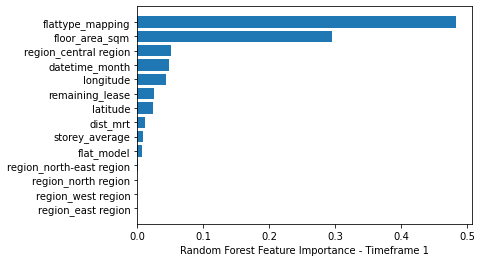

In [63]:
sorted_idx = rf_regressor1.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf_regressor1.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance - Timeframe 1")

Text(0.5, 0, 'Random Forest Feature Importance - Timeframe 2')

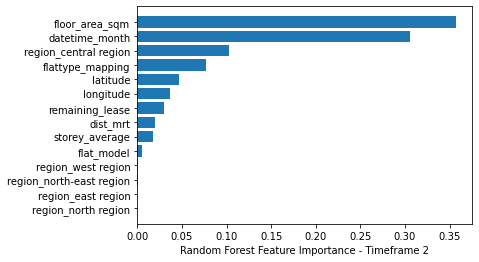

In [64]:
sorted_idx = rf_regressor2.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf_regressor2.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance - Timeframe 2")

Text(0.5, 0, 'Random Forest Feature Importance - Timeframe 3')

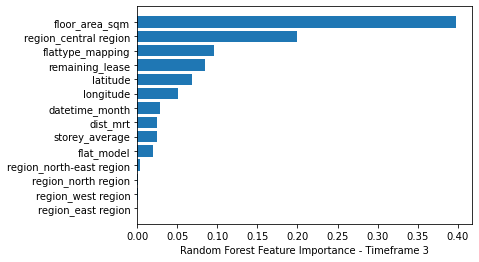

In [65]:
sorted_idx = rf_regressor3.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf_regressor3.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance - Timeframe 3")

In [69]:
importances = xgb_regressor2.feature_importances_
indices = np.argsort(importances)[::-1]
print("Top 5 Feature ranking for first timeframe:")
for f in range(5):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    
importances = xgb_regressor2.feature_importances_
indices = np.argsort(importances)[::-1]
print("\n\nTop 5 Feature ranking for second timeframe:")
for f in range(5):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))
    
importances = xgb_regressor3.feature_importances_
indices = np.argsort(importances)[::-1]
print("\n\nTop 5 Feature ranking for third timeframe:")
for f in range(5):
    print("%d. feature %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Top 5 Feature ranking for first timeframe:
1. feature flattype_mapping (0.580943)
2. feature region_central region (0.277199)
3. feature datetime_month (0.043746)
4. feature floor_area_sqm (0.042718)
5. feature region_north-east region (0.014508)


Top 5 Feature ranking for second timeframe:
1. feature flattype_mapping (0.580943)
2. feature region_central region (0.277199)
3. feature datetime_month (0.043746)
4. feature floor_area_sqm (0.042718)
5. feature region_north-east region (0.014508)


Top 5 Feature ranking for third timeframe:
1. feature region_central region (0.496093)
2. feature flattype_mapping (0.372567)
3. feature floor_area_sqm (0.045829)
4. feature region_north-east region (0.020886)
5. feature remaining_lease (0.013885)
